# Dogs vs Cats

https://www.kaggle.com/ajayrana/hymenoptera-data

In [22]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

print(tf.__version__)
print(tf.executing_eagerly())

2.4.0
True


In [23]:
import os
from random import shuffle
from glob import glob

In [22]:
# dir_1 = 'D:\\Учеба\\Lern DS of Netology\\Курс ML 4 CV и нейросетки\\01_Нейронные сети\\hymenoptera_data\\train\\ants'
# dir_2 = 'D:\\Учеба\\Lern DS of Netology\\Курс ML 4 CV и нейросетки\\01_Нейронные сети\\hymenoptera_data\\train\\bees'
# dir_3 = 'D:\\Учеба\\Lern DS of Netology\\Курс ML 4 CV и нейросетки\\01_Нейронные сети\\hymenoptera_data\\val\\ants'
# dir_4 = 'D:\\Учеба\\Lern DS of Netology\\Курс ML 4 CV и нейросетки\\01_Нейронные сети\\hymenoptera_data\\val\\bees'

In [31]:
# dir_5=[dir_1, dir_2, dir_3, dir_4]
# for direct in dir_5:
#     direct = direct.replace('\\', '/')
#     target = direct[-4:]
#     for file in os.listdir(direct):
#         if file.endswith('jpg'):
#             os.rename(f'{direct}/{file}', f'{direct}/{target}.{file}')

D:/Учеба/Lern DS of Netology/Курс ML 4 CV и нейросетки/01_Нейронные сети/hymenoptera_data/train/ants
D:/Учеба/Lern DS of Netology/Курс ML 4 CV и нейросетки/01_Нейронные сети/hymenoptera_data/train/bees
D:/Учеба/Lern DS of Netology/Курс ML 4 CV и нейросетки/01_Нейронные сети/hymenoptera_data/val/ants
D:/Учеба/Lern DS of Netology/Курс ML 4 CV и нейросетки/01_Нейронные сети/hymenoptera_data/val/bees


In [24]:
train_files_ants = glob('hymenoptera_data/train/ants/*.jpg')
test_files_ants = glob('hymenoptera_data/val/ants/*.jpg')
train_files_bees = glob('hymenoptera_data/train/bees/*.jpg')
test_files_bees = glob('hymenoptera_data/val/bees/*.jpg')

train_files = train_files_ants + train_files_bees
test_files = test_files_ants + test_files_bees

In [25]:
train_files[:5]

['hymenoptera_data/train/ants\\ants.0013035.jpg',
 'hymenoptera_data/train/ants\\ants.1030023514_aad5c608f9.jpg',
 'hymenoptera_data/train/ants\\ants.1095476100_3906d8afde.jpg',
 'hymenoptera_data/train/ants\\ants.1099452230_d1949d3250.jpg',
 'hymenoptera_data/train/ants\\ants.116570827_e9c126745d.jpg']

In [49]:
img = cv2.imread('hymenoptera_data/train/ants/ants.0013035.jpg')

In [50]:
cv2.imshow('ants', img)
cv2.waitKey(0)

-1

In [52]:
img.shape

(512, 768, 3)

## Визуализируем примеры для обучения

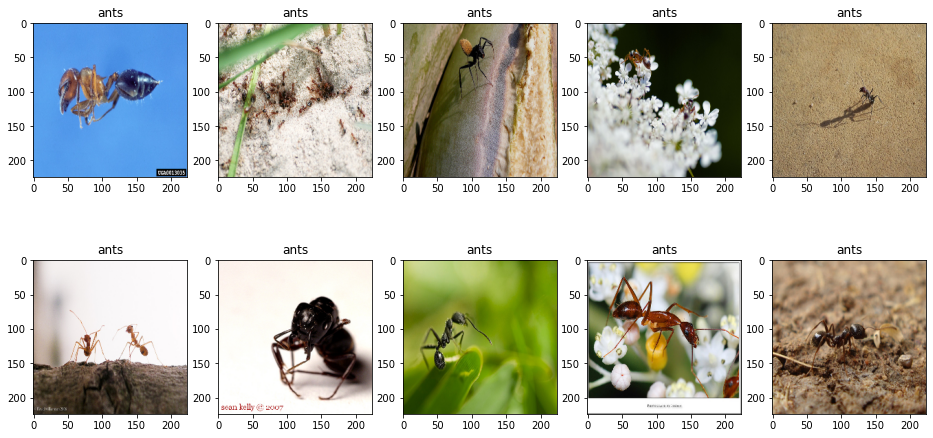

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1][0:4])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Функции загрузки данных

In [53]:
IMG_SIZE = (224, 224)  # размер входного изображения сети

In [63]:
# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return img  

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if os.path.basename(path).startswith('ants') else 0.
                          for path in files[i:j]])
            yield (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

## Собираем сверточную сеть для обучения

In [76]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    
    #tf.keras.layers.Dropout(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 6)       456       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1605664   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [95]:
train_img = np.array([load_image(path) for path in train_files])
train_label = np.array([1. if os.path.basename(path).startswith('ants') else 0. for path in train_files])

In [100]:
train_files[:1]

['hymenoptera_data/train/bees\\bees.132511197_0b86ad0fff.jpg']

In [101]:
os.path.basename(train_files[:1][0]), train_img[:1].shape, train_label[:1]

('bees.132511197_0b86ad0fff.jpg', (1, 224, 224, 3), array([0.]))

In [102]:
os.path.basename(train_files[100:101][0]), train_img[100:101].shape, train_label[100:101]

('ants.hormiga_co_por.jpg', (1, 224, 224, 3), array([1.]))

In [97]:
# запускаем процесс обучения
model_1.fit(train_img, 
          train_label,
          batch_size=32, 
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 4s 561ms/step - loss: 1.5448 - accuracy: 0.6256 - val_loss: 1.4237 - val_accuracy: 0.5918
Epoch 2/10
7/7 [==============================] - 4s 548ms/step - loss: 0.8523 - accuracy: 0.6667 - val_loss: 1.1278 - val_accuracy: 0.5306
Epoch 3/10
7/7 [==============================] - 4s 557ms/step - loss: 0.6782 - accuracy: 0.6359 - val_loss: 1.0094 - val_accuracy: 0.6122
Epoch 4/10
7/7 [==============================] - 4s 565ms/step - loss: 0.4070 - accuracy: 0.7846 - val_loss: 1.0054 - val_accuracy: 0.5714
Epoch 5/10
7/7 [==============================] - 4s 551ms/step - loss: 0.3076 - accuracy: 0.8769 - val_loss: 0.9893 - val_accuracy: 0.5918
Epoch 6/10
7/7 [==============================] - 4s 563ms/step - loss: 0.2436 - accuracy: 0.9231 - val_loss: 1.0097 - val_accuracy: 0.5714
Epoch 7/10
7/7 [==============================] - 4s 572ms/step - loss: 0.2123 - accuracy: 0.9179 - val_loss: 1.0133 - val_accuracy: 0.5510
Epoch 8/10
7/7 [====

In [103]:
test_img = np.array([load_image(path) for path in test_files])
test_label = np.array([1. if os.path.basename(path).startswith('ants') else 0. for path in test_files])

In [104]:
test_pred_1 = model_1.predict(test_img)

In [107]:
test_pred_1[:5], test_label[:5]

(array([[0.66001886],
        [0.65971065],
        [0.17390266],
        [0.8863802 ],
        [0.58524483]], dtype=float32),
 array([1., 1., 1., 1., 1.]))

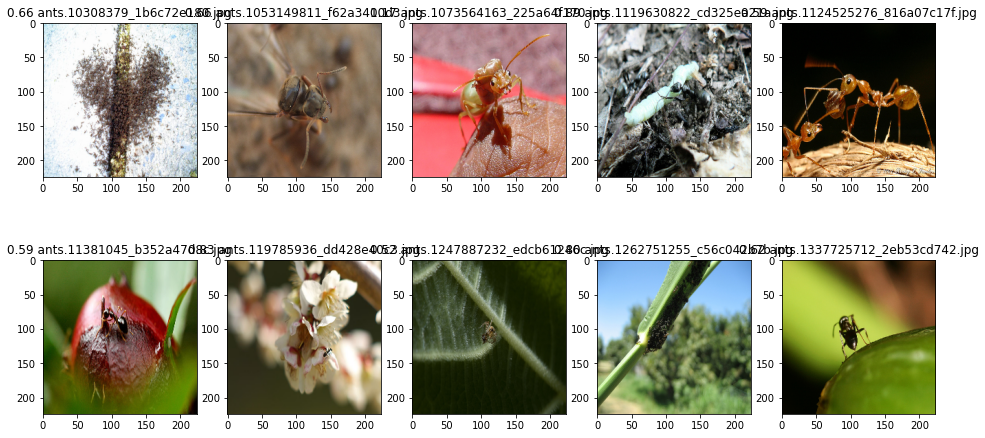

In [108]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred_1[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

In [124]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
 
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    tf.keras.layers.Flatten(),
      
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [125]:
model_2.fit(train_img, 
          train_label,
          batch_size=32, 
          epochs=10, 
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 6s 755ms/step - loss: 2.1246 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/10
7/7 [==============================] - 5s 727ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 3/10
7/7 [==============================] - 5s 722ms/step - loss: 0.6932 - accuracy: 0.4791 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/10
7/7 [==============================] - 5s 737ms/step - loss: 0.6932 - accuracy: 0.4886 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 5/10
7/7 [==============================] - 5s 754ms/step - loss: 0.6931 - accuracy: 0.5211 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 6/10
7/7 [==============================] - 6s 796ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 7/10
7/7 [==============================] - 5s 768ms/step - loss: 0.6932 - accuracy: 0.4700 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 8/10
7/7 [====

In [126]:
test_pred_2 = model_2.predict(test_img)

In [127]:
test_pred_2[:5], test_label[:5]

(array([[0.49905017],
        [0.49905017],
        [0.49905017],
        [0.49905017],
        [0.49905017]], dtype=float32),
 array([1., 1., 1., 1., 1.]))

## Загружаем предобученную модель

In [110]:
# base_model - объект класса keras.models.Model (Functional Model)
base_model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [111]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Добавляем полносвязный слой

In [116]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)

## Выводим архитектуру модели

In [117]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Компилируем модель и запускаем обучение

In [114]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [115]:
val_samples = 5  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
model.fit(train_data,
          steps_per_epoch=5,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)

Epoch 1/10
5/5 [==============================] - 19s 3s/step - loss: 0.6811 - accuracy: 0.4944 - val_loss: 0.6083 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 0.3978 - accuracy: 0.8556 - val_loss: 0.2813 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.1880 - accuracy: 0.9312 - val_loss: 1.0196 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.1669 - accuracy: 0.9562 - val_loss: 0.4187 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.0877 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.0753 - accuracy: 1.0000 - val_loss: 0.4157 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 15s 3s/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.6535 - val_accuracy: 0.6000
Epoch 8/10
5/5 [==================

## Предсказания на проверочной выборке

In [118]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

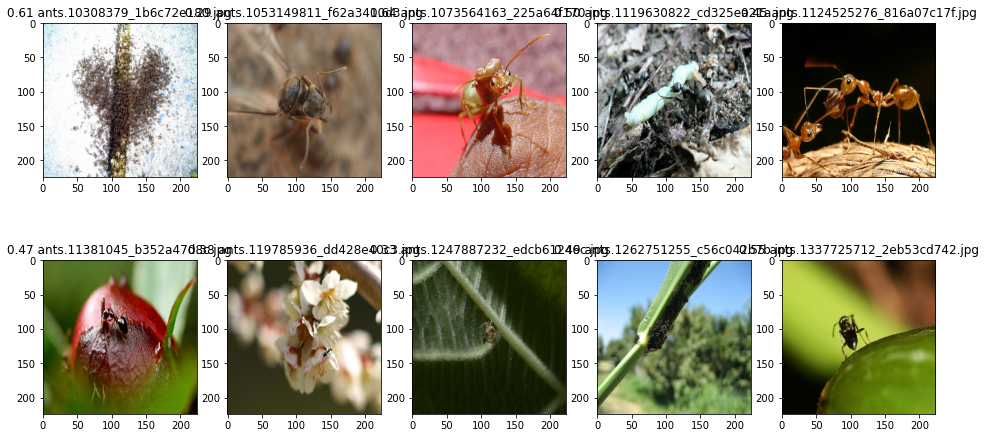

In [119]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

In [ ]:
model=ResNet50(weights='imagenet')